In [1]:
import numpy as np
from osgeo import gdal, ogr, gdalnumeric
import os
import pickle
import gdal, gdalnumeric
from gdalconst import * 
import matplotlib.pyplot as plt
from osgeo import gdal_array
# import json
# from keras.models import Sequential
# from keras.models import model_from_json

# json_file=open('model_cnn_11.json', 'r')
# loaded_model_json=json_file.read()
# json_file.close()
# loaded_model=model_from_json(loaded_model_json)

# loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [4]:
Image  = gdal.Open('data\\NI1_K4_HS_MNF.dat', GA_ReadOnly)

filename = 'C:\\cysia\\CNN-to-lc-classification\\wyniki\\SVM_MNF\\15\\svm_model.sav'
model = pickle.load(open(filename, 'rb'))

In [23]:
coords=(Image.GetGeoTransform()[0], Image.GetGeoTransform()[3])

In [4]:
# Fetch number of rows and columns
ncol = Image.RasterXSize
nrow = Image.RasterYSize

# Fetch projection and extent
proj = Image.GetProjectionRef()
ext = Image.GetGeoTransform()

# Create the raster dataset
out_raster_name='klasyfikacja_test6.tiff'
memory_driver = gdal.GetDriverByName('GTiff')
out_raster_ds = memory_driver.Create(out_raster_name, 200, 200, 1, gdal.GDT_UInt16)

# Set the ROI image's projection and extent to our input raster's projection and extent
out_raster_ds.SetProjection(proj)
out_raster_ds.SetGeoTransform(ext)

out_raster=out_raster_ds.ReadAsArray()

In [44]:
a = np.zeros((10,10))
a.fill(-1)
a

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [49]:
Image.ReadAsArray(0, 1, 1, 1)
nBands = Image.RasterCount      # how many bands, to help you loop
nRows  = Image.RasterYSize
nCols  = Image.RasterXSize 
newShape = (430, 400*400)
print(nRows, nCols)
nR=200
nC=200

outputImage=np.zeros((nR, nC))
outputImage.fill(-1)
outband = out_raster_ds.GetRasterBand(1)

# print(Image.ReadAsArray(1, 1, 1, 1))
# for x in range(nRows-1):
#     for y in range(nCols-1):
#         i = Image.ReadAsArray(x, y, 1, 1)
#         pred=model.predict(i.reshape(1, -1))
#         print(pred)
#         print('x, y:', x, y)
#         outputImage[y][x]=pred

print(Image.ReadAsArray(1, 1, 1, 1))
for x in range(nR):
    for y in range(nC):
        i = Image.ReadAsArray(x, y, 1, 1)
        pred=model.predict(i.reshape(1, -1))
        outputImage[x][y]=pred
        




4543 5600
[[[ 111]]

 [[ 116]]

 [[ 123]]

 [[ 131]]

 [[ 135]]

 [[ 140]]

 [[ 144]]

 [[ 146]]

 [[ 148]]

 [[ 151]]

 [[ 156]]

 [[ 156]]

 [[ 158]]

 [[ 160]]

 [[ 159]]

 [[ 159]]

 [[ 157]]

 [[ 157]]

 [[ 159]]

 [[ 163]]

 [[ 166]]

 [[ 169]]

 [[ 169]]

 [[ 169]]

 [[ 172]]

 [[ 173]]

 [[ 179]]

 [[ 188]]

 [[ 205]]

 [[ 224]]

 [[ 249]]

 [[ 278]]

 [[ 314]]

 [[ 352]]

 [[ 395]]

 [[ 441]]

 [[ 487]]

 [[ 528]]

 [[ 559]]

 [[ 577]]

 [[ 593]]

 [[ 608]]

 [[ 620]]

 [[ 627]]

 [[ 630]]

 [[ 620]]

 [[ 601]]

 [[ 573]]

 [[ 538]]

 [[ 504]]

 [[ 477]]

 [[ 453]]

 [[ 434]]

 [[ 419]]

 [[ 408]]

 [[ 399]]

 [[ 392]]

 [[ 386]]

 [[ 384]]

 [[ 381]]

 [[ 376]]

 [[ 364]]

 [[ 351]]

 [[ 338]]

 [[ 329]]

 [[ 323]]

 [[ 318]]

 [[ 312]]

 [[ 308]]

 [[ 304]]

 [[ 294]]

 [[ 285]]

 [[ 274]]

 [[ 261]]

 [[ 248]]

 [[ 234]]

 [[ 223]]

 [[ 215]]

 [[ 208]]

 [[ 202]]

 [[ 203]]

 [[ 193]]

 [[ 175]]

 [[ 175]]

 [[ 215]]

 [[ 308]]

 [[ 458]]

 [[ 655]]

 [[ 881]]

 [[1112]]



In [24]:
import gdal, ogr, os, osr
import numpy as np


def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()


def main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    reversed_arr = array[::-1] # reverse array so the tif looks like the array
    array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr) # convert array to raster

In [50]:
main('tescik200.tiff', coords, nR, nC, outputImage)

%matplotlib inline
import matplotlib.pyplot as plt

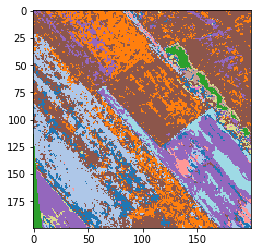

In [108]:
#oI=outputImage.reshape(4543, 5600)
plt.imshow(outputImage, cmap='tab20')
plt.legend(cmap='tab20')

#plt.savefig('klasyfikacja2sample4.png')

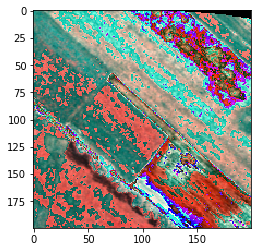

In [94]:
import spectral.io.envi as envi
import matplotlib.pyplot as plt
from spectral import *

image=Image.ReadAsArray(1, 1, 200, 200)
image1 = image[70, :, :]
image2=image[7, :, :]
image3=image[3, :, :]
im=np.array([image1, image2, image3], dtype = "uint8")
x = np.moveaxis(im, 0, -1)
plt.imshow(x)
plt.savefig('obraz3.png')

In [17]:
Band   = Image.GetRasterBand(1) # 1 based, for this example only the first
NoData = Band.GetNoDataValue()  # this might be important later

nBands = Image.RasterCount      # how many bands, to help you loop
nRows  = Image.RasterYSize      # how many rows
nCols  = Image.RasterXSize      # how many columns
dType  = Band.DataType          # the datatype for this band

outputImage=np.zeros((1, nRows, nCols))

RowRange = range(nRows)
for nb, ThisRow in enumerate(RowRange):
    # read a single line from this band
    ThisLine = Band.ReadRaster(0,ThisRow,nCols,1,nCols,1,dType)
    ThisLineA= Image.ReadAsArray(0,ThisRow, nRows, nCols,)
    print(type(ThisLineA))

#     Ypred=model.predict(ThisLine)
#     outputImage[0, nb, :] = Ypred

    if ThisRow % 100 == 0: # report every 100 lines
        print("Scanning %d of %d" % (ThisRow,nRows))

    for Val in ThisLine: # some simple test on the values
        if Val == 65535:
            print('Bad value')

Image = None # close the raster


<class 'NoneType'>
Scanning 0 of 4543
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>


KeyboardInterrupt: 